<a href="https://colab.research.google.com/github/noushadkhan01/Data-Science-Projects/blob/master/Titanic_machine_learning_from_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!git clone https://github.com/noushadkhan01/my_methods

Cloning into 'my_methods'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 348 (delta 20), reused 0 (delta 0), pack-reused 307
Receiving objects: 100% (348/348), 91.03 KiB | 597.00 KiB/s, done.
Resolving deltas: 100% (205/205), done.


In [4]:
!ls

my_methods  sample_data


In [5]:
%cd my_methods

/content/my_methods


In [6]:
!ls

choose_best_classifier.py	      my_global_variables.py
choose_best_regressor.py	      my_roc_curve.py
choose_optimal_number_of_clusters.py  plot_text.py
get_cross_validation.py		      print_model_results.py
initialize_weights.py		      README.md
my_backward_propagation.py	      sgd_neural_net.py
my_cap_curve.py			      visualise_classifier_performance.py
my_dummy_variable_creator.py


In [0]:
import my_global_variables

In [0]:
my_global_variables.init()

##import titanic dataset from kaggle

In [9]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import kaggle
!kaggle competitions download -c titanic

Saving kaggle.json to kaggle.json
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.2MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.93MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.8MB/s]


In [10]:
!ls

choose_best_classifier.py	      my_global_variables.py
choose_best_regressor.py	      my_roc_curve.py
choose_optimal_number_of_clusters.py  plot_text.py
gender_submission.csv		      print_model_results.py
get_cross_validation.py		      __pycache__
initialize_weights.py		      README.md
kaggle.json			      sgd_neural_net.py
my_backward_propagation.py	      test.csv
my_cap_curve.py			      train.csv
my_dummy_variable_creator.py	      visualise_classifier_performance.py


In [0]:
train = pd.read_csv('train.csv')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test = pd.read_csv('test.csv')

In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#EDA

## profile report of dataset

In [15]:
combined = pd.concat([train, test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [17]:
combined.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [0]:
from pandas_profiling import ProfileReport

In [19]:
train.shape, test.shape

((891, 12), (418, 11))

In [20]:
profile_report = ProfileReport(combined).to_file('titanic_profile_report.html')

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [21]:
!ls

choose_best_classifier.py	      my_roc_curve.py
choose_best_regressor.py	      plot_text.py
choose_optimal_number_of_clusters.py  print_model_results.py
gender_submission.csv		      __pycache__
get_cross_validation.py		      README.md
initialize_weights.py		      sgd_neural_net.py
kaggle.json			      test.csv
my_backward_propagation.py	      titanic_profile_report.html
my_cap_curve.py			      train.csv
my_dummy_variable_creator.py	      visualise_classifier_performance.py
my_global_variables.py


[visit profile report](https://bit.ly/2tYpeaX)

In [22]:
combined.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


In [23]:
train.shape, test.shape

((891, 12), (418, 11))

In [24]:
combined[len(train):].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298


In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##check for missing vaues

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
combined.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [34]:
combined.Cabin.unique()[:10]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78'], dtype=object)

In [0]:
combined2 = combined.copy()

In [45]:
combined.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [0]:
combined2 = combined[['Fare', 'Cabin', 'Survived']]

In [47]:
combined2 = combined2.dropna()
combined2.shape

(204, 3)

In [48]:
combined2['Cabin'] = combined2.Cabin.apply(lambda x: x[0])
combined2.Cabin[:10]

1     C
3     C
6     E
10    G
11    C
21    D
23    A
27    C
31    B
52    D
Name: Cabin, dtype: object

In [0]:
import seaborn as sns

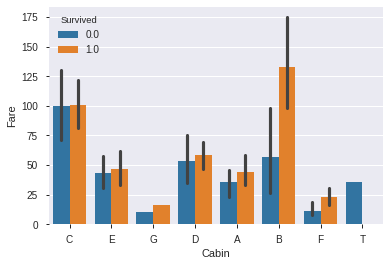

In [52]:
sns.barplot(x = 'Cabin', y = 'Fare', data = combined2, hue = 'Survived')

In [53]:
combined2.shape

(204, 3)